In [17]:
from data import CrowdDataSet 
import matplotlib.pyplot as plt
import numpy as np
from data import CrowdDataSet 
from data import default_train_transforms, default_val_transforms, default_exploration_transform
from torchvision import transforms
from PIL import Image
from utils import get_density_map_gaussian

loaders = {
    "train": CrowdDataSet(
        'part_A/train_data', default_train_transforms()
    ),
    "no_normalize": CrowdDataSet(
        'part_A/train_data', default_exploration_transform()
    ),
}

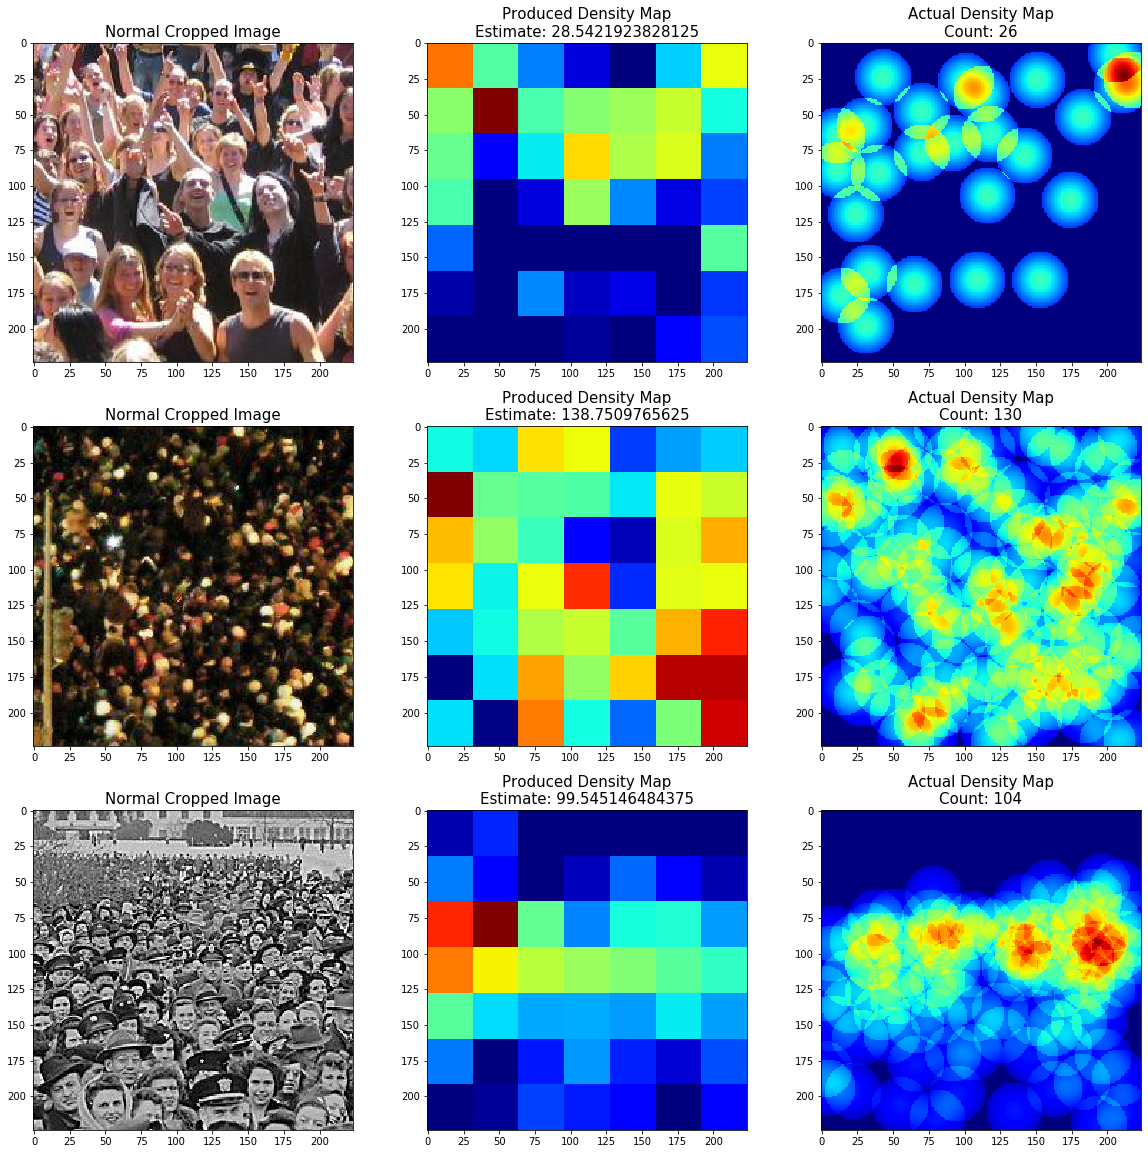

In [32]:
import torch

model = torch.load('saved_models/vgg16_density_map')
model.eval()

fg, axs = plt.subplots(3, 3, figsize=(20, 20))

for index, i in enumerate([3, 50, 78]):
    x = loaders['no_normalize'][i]
    axs[index, 0].imshow(transforms.ToPILImage()(x['image']).convert('RGB'))
    axs[index, 0].set_title("Normal Cropped Image", fontsize=15)

    dt = loaders['train'][i]
    image = dt['image'].to()
    gt = dt['gt']

    predictions = model(image[None, ...].float())
    predictions = predictions.squeeze().data.cpu().numpy() 
    axs[index, 1].imshow(predictions, cmap=plt.cm.jet)
    axs[index, 1].set_title("Produced Density Map\nEstimate: {}".format(np.sum(predictions)/100), fontsize=15)
    
    k = np.zeros((224, 224))
    k = get_density_map_gaussian(k, gt, adaptive_mode=False)
    axs[index, 2].imshow(k, cmap=plt.cm.jet)
    axs[index, 2].set_title('Actual Density Map\nCount: {}'.format(len(gt)), fontsize=15)
    
fg.savefig('results/vgg16_den_map_demo')